# WELLBEING AND GDP

Introduction:

In this Project we want to analyze Data about Wellbeing and GDP. We therefore use Datasets from OECD and worls Bank respectively. 

First we download one part of the Data manually and the other one with an API. When then clean and shorten the Data for better vizualisation. Finally we merge both Datasets and show some plots of the variables that we're intrested in. 
The variables that we analzye are 'deaths from suicide, alcohol and drugs' and GDP per capita, PPP. It can be interesting too see how these evolve over time. Especially becuse Wellbeing or instability become more important topics in the past years. 


Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

We take data from OECD.org about "How is life - Well being" The data is over the entire population (age, gender,education)
We then focus on the indicator: deaths from suicide, alcohol and drugs

Definition: Suicide, alcohol- and drug-related deaths is an objective measure of severe mental illness and addiction.
The indicator reported here is drawn from official death registries obtained from the WHO Mortality Database and OECD calculations of population statistics, and refers to combined deaths from suicides, alcohol and drug abuse per
100 000 population (standardised to 2010).

On the other hand we use Data from the World Bank for a country's GDP. 

In [2]:
#import Data on well being from csv file
filename = './HSL.csv'
wlb = pd.read_csv(filename)

wlb.head(10)

,LOCATION,Country,TYPE_VAR,Type of indicator,VARIABLE,Indicator,WB,Current/Future Well-being,SEX,Sex,AGE,Age,EDUCATION,Education,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2004,2004,28476.0,NaN,NaN
1,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2005,2005,28730.0,NaN,NaN
2,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2006,2006,29777.0,NaN,NaN
3,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2007,2007,30911.0,NaN,NaN
4,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2008,2008,32475.0,NaN,NaN
5,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2009,2009,32205.0,NaN,NaN
6,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2010,2010,33505.0,NaN,NaN
7,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2011,2011,34050.0,NaN,NaN
8,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2012,2012,33617.0,NaN,NaN
9,AUS,Australia,AVERAGE,Average,1_1,Household income,CWB,Current Well-being,TOT,Total population,TOT,Total population,TOT,Total population,2013,2013,34011.0,NaN,NaN


The Dataset contains a lot of double information. We therefore drop all the columns that have unnecessary information. 

Further we want to drop the columns with missing values as we cannot use them for our project. 

In [3]:
#remove unnecessary/double information

drop_these = ['LOCATION', 'TYPE_VAR', 'VARIABLE', 'Sex', 'Education', 'Time', 'Flag Codes', 'Flags', 'Age', 'WB']
wlb.drop(drop_these, axis = 1, inplace=True)

#drop missing values

wlb.dropna(axis=0, subset=None, inplace=False)


wlb.head(10)

,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value
0,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2004,28476.0
1,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2005,28730.0
2,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2006,29777.0
3,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2007,30911.0
4,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2008,32475.0
5,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2009,32205.0
6,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2010,33505.0
7,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2011,34050.0
8,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2012,33617.0
9,Australia,Average,Household income,Current Well-being,TOT,TOT,TOT,2013,34011.0


In a second part we dowload the Data for GDP from World Bank as we are interested in the relationship between GDP and our Wellbeing Variable. As the Dataset for Wellbeing starts in 2004 we choose to only download GDP Data from then on as well. 

We also rename the columns for a better viewing of the Dataset. 

In [4]:
from pandas_datareader import wb

#download Data on GDP and rename

wb_gdp = wb.download(indicator='NY.GDP.PCAP.PP.CD', start=2004, end=2022)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.PP.CD':'GDP_per_capita'})


wb_gdp.head()


GDP_per_capita
country year                
Canada  2021    52789.675434
        2020    47166.008979
        2019    49783.411866
        2018    49992.762276
        2017    48317.174584

In [5]:
#reset the index of a DataFrame
wb_gdp.reset_index(inplace=True)
wb_gdp.rename(columns = {'country':'Country'}, inplace=True)
wb_gdp.rename(columns = {'year':'TIME'}, inplace=True)

wb_gdp.head()

,Country,TIME,GDP_per_capita
0,Canada,2021,52789.675434
1,Canada,2020,47166.008979
2,Canada,2019,49783.411866
3,Canada,2018,49992.762276
4,Canada,2017,48317.174584


## Explore each data set

xxx

In [6]:
#clean data about wellbeing and filter for Canada

# Data frame with Canada
wlb_canada = wlb.loc[wlb['Country'] == 'Canada', :]
wlb_canada_av = wlb_canada.loc[wlb_canada['Type of indicator'] == 'Average', :]#probaly we could do this in one line but i dont know exactly how

wlb_data = wlb_canada_av.loc[wlb_canada_av['Indicator'] == 'Satisfaction with time use', :] #there ar only 2 values so we should use something else

#I think this might be a good proxy for well being, so we could plot it with the GDP?
wlb_social = wlb_canada_av.loc[wlb_canada_av['Indicator'] == 'Deaths from suicide, alcohol, drugs', :]



In [7]:
wlb_social

,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value
1046,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2004,17.696274
1047,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2005,18.234295
1048,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2006,17.811861
1049,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2007,18.060709
1050,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2008,18.155138
1051,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2009,18.477999
1052,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2010,18.552164
1053,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2011,18.210234
1054,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2012,18.654758
1055,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2013,18.968445


**Interactive plot** :

In [8]:
def plot_data(country):
    data = wb_gdp[wb_gdp['Country'] == country].sort_values('TIME', ascending=True)
    x1 = data['TIME']
    x2 = data['GDP_per_capita'] 
    
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x1, x2)
    plt.xlabel('Time')
    plt.ylabel('GDP_per_capita,PPP')
    plt.title('{}: GDP_per_capita over Time'.format(country))
   

widgets.interact(plot_data, country=widgets.Dropdown(options=list(wb_gdp['Country'].unique()), value=wb_gdp['Country'].unique()[0], description='Country'))

plt.show()

interactive(children=(Dropdown(description='Country', options=('Canada', 'Mexico', 'United States'), value='Ca…

When select the different country, we can see during the past 18 years, all three countries experienced economic growth. However, while Canada and the United States were able to recover their economies after 2020, Mexico has yet to experience the same level of recovery. 

While Canada and the U.S. adopted massive fiscal and monetary policy stimulus measures during the epidemic to spur economic growth and job creation, Mexico's fiscal and monetary policy stimulus measures may not have been of the same scale or effect.

In addition, the structure of the Mexican economy may also be a factor. Mexico's economy is highly dependent on exports and manufacturing, and the instability of the international trade situation during the epidemic may have had a negative impact on its economy.


# Merge data sets

We merge both datasets "Wellbeing" and "GDP" on the variables "country" and "time". 

In [10]:
#convert a non-existent column to string data type 
wlb_social['TIME'] = wlb_social['TIME'].astype(str)
wb_gdp['TIME'] = wb_gdp['TIME'].astype(str)
wlb_social['Country'] = wlb_social['Country'].astype(str)
wb_gdp['Country'] = wb_gdp['Country'].astype(str)

#inner merge
inner = pd.merge(wlb_social,wb_gdp,how='inner',on=['Country','TIME'])

inner


C:\Users\Yas\AppData\Local\Temp\ipykernel_16556\300065022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlb_social['TIME'] = wlb_social['TIME'].astype(str)
C:\Users\Yas\AppData\Local\Temp\ipykernel_16556\300065022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wlb_social['Country'] = wlb_social['Country'].astype(str)


,Country,Type of indicator,Indicator,Current/Future Well-being,SEX,AGE,EDUCATION,TIME,Value,GDP_per_capita
0,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2004,17.696274,33925.706732
1,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2005,18.234295,36327.228654
2,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2006,17.811861,38119.413196
3,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2007,18.060709,39575.309748
4,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2008,18.155138,40376.306880
5,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2009,18.477999,38865.413458
6,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2010,18.552164,40099.448239
7,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2011,18.210234,41666.707627
8,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2012,18.654758,42290.965410
9,Canada,Average,"Deaths from suicide, alcohol, drugs",Current Well-being,TOT,TOT,TOT,2013,18.968445,44298.578734


For illustration reasons we want to plot both graphs individually. 
Therefore we use the data from the merged set (however we could have also directly used the "normal" dataset)

This graph shows the upwards trend of GDP in Canada since 2004

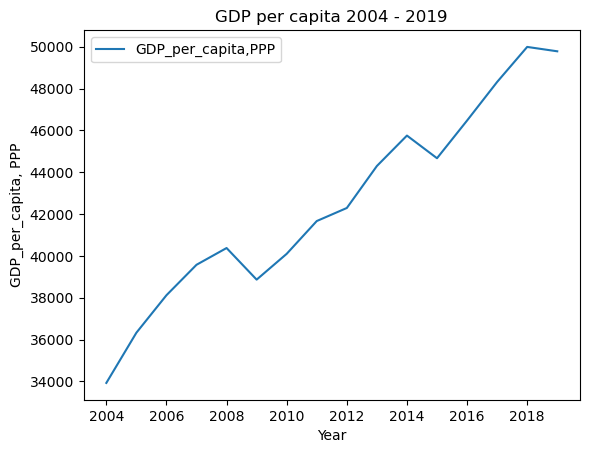

In [19]:
#plot how GDP changes over the years 

ax = inner.plot(x='TIME', y='GDP_per_capita', label = 'GDP_per_capita,PPP')
ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('GDP_per_capita, PPP')
ax.set_title('GDP per capita, 2004 - 2019')

plt.show()

We then do the same for the Values for deaths from suicide, alcohol and drugs (also taken from the new merged dataset). 

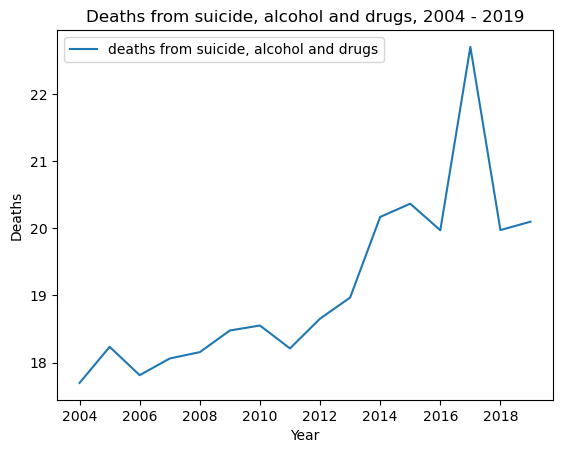

In [17]:
# Plot the values of deaths from suicide, alcohol and drugs over time 
ax = inner.plot(x='TIME',y='Value', label = 'deaths from suicide, alcohol and drugs');
ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('Deaths')
ax.set_title('Deaths from suicide, alcohol and drugs, 2004 - 2019')

plt.show()

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [28]:
inner.describe()

,Value,GDP_per_capita
count,16.000000,16.000000
mean,19.132017,42533.412422
std,1.324288,4767.303394
min,17.696274,33925.706732
25%,18.196460,39397.835676
50%,18.603461,41978.836519
75%,20.006112,45933.397978
max,22.705107,49992.762276


We have 16 observations in our dataset (years 2004 - 2018). The value of deaths goes from 17.696 to 22.705 with a mean of 19.132. THe GDP varies from 33925.706 to 49992.762 with a mean of 42533.412

# Conclusion

For the simplicity we decide to focus on only one OECD country: Canada. We expect the effects to be similar in other OECD countries. 

GDP: 
There is a clear upwards trend in GDP with some little irregularities in 2009 and 2015. The bump in 2009 could be explained by the financial crisis for instance. However overall we can consider GDP per capita to be growing between 2004 and 2018. 

Well being: 
We choose to use the variable "Deaths from suicide, alcohol, drugs" as a proxy for wellbeing. In a country where people are happy these variable can expected to be low. 

We can see an upwards trend in Deaths from suicide, alcohol, drugs, meaning that wellbeing is getting worse. Noteworthy is forthermore the peak in the year 2017 where the variable took its highest values. 

Hence we can see an upwards trend for both variables. This arises the question if with rising GDP the deaths from suicide, alcohol, drugs rise what would mean wellbeing is decreasing.  
Illustration below. 

However it could be critized that death from suicide, alcohol, and drugs indicates some unbalances in the country rather than the general well-being. There would probably be measures such as quality of life, expected lifetime, and happiness which would capture our question better. For reasons of simplicity we did nevertheless use death from suicide, alcohol, and drugs as an approximation as we assume that wellbeing correlates with less such deaths.


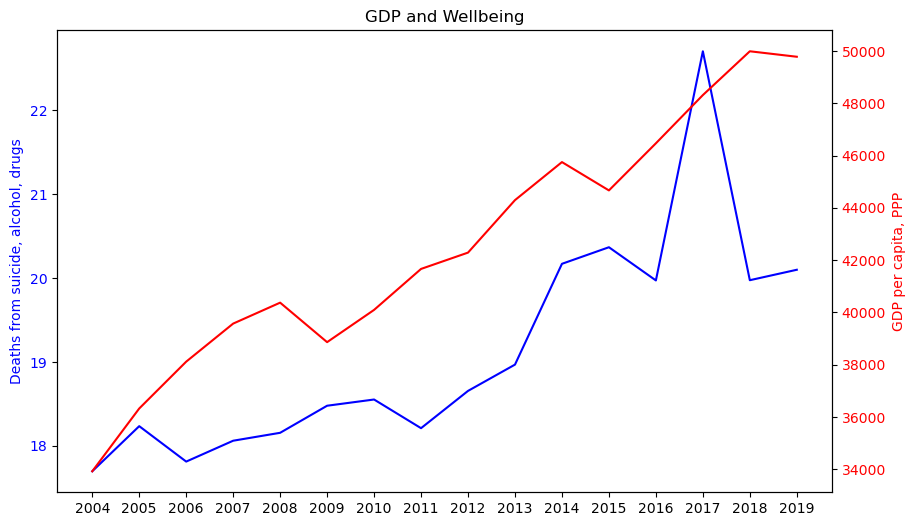

In [29]:
# generate some example data
x = inner.TIME
y1 = inner.Value
y2 = inner.GDP_per_capita

# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot the first variable on the left axis
ax1.plot(x, y1, color='blue')
ax1.set_ylabel('Deaths from suicide, alcohol, drugs', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second axis on the right
ax2 = ax1.twinx()

# plot the second variable on the right axis
ax2.plot(x, y2, color='red')
ax2.set_ylabel('GDP per capita, PPP', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# add a title
plt.title('GDP and Wellbeing')

# show the plot
plt.show()